# Unsupervised ML Algorithm
## K-Means Clustering

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets\income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


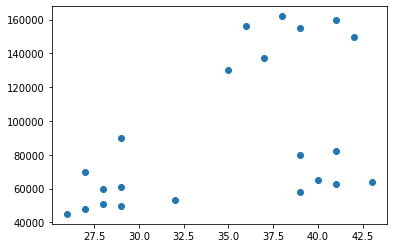

In [3]:
plt.scatter(df['Age'],df['Income($)'])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df['cluster'] = y_pred
df.head(5)

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


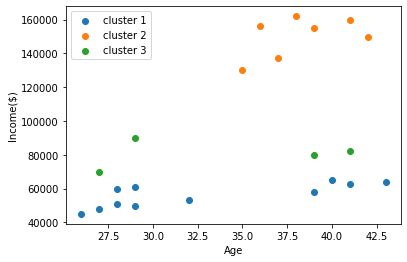

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],label='cluster 1')
plt.scatter(df2.Age,df2['Income($)'],label='cluster 2')
plt.scatter(df3.Age,df3['Income($)'],label='cluster 3')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

The above clusters are improper due to poor scaling. Here y-axis i.e income ranges from [40k - 160k] while x-axis only ranges from [0 - 45]. Therefore some pre-processing needs to be done like using min-max scaler to avoid this.

## using MinMax Scaler

In [8]:
scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df['Age'] = scaler.fit_transform(df[['Age']])
df.head(5)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [9]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [10]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [11]:
km.cluster_centers_  #centroid of the clusters

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

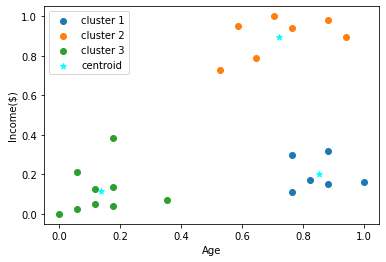

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],label='cluster 1')
plt.scatter(df2.Age,df2['Income($)'],label='cluster 2')
plt.scatter(df3.Age,df3['Income($)'],label='cluster 3')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',label='centroid',color='cyan')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

## Elbow Method

In [13]:
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)  #km.inertia_ gives SSE

In [14]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3625079900797329,
 0.2621792762345213,
 0.22395807059250125,
 0.1685851223602976,
 0.13706529523670866,
 0.11258092733597716]

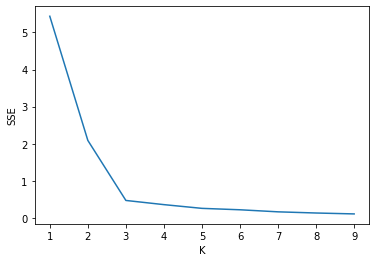

In [15]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range,sse)